In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## The output data of admixture

In [3]:
admixture_q = pd.read_table("../../examples/data/admixture.output.Q", sep=" ", header=None)
admixture_q

,0,1,2,3,4,5,6,7,8,9,10
0,0.00001,0.00001,0.00001,0.246844,0.00001,0.00001,0.00001,0.753066,0.00001,0.000010,0.00001
1,0.00001,0.00001,0.00001,0.253760,0.00001,0.00001,0.00001,0.746150,0.00001,0.000010,0.00001
2,0.00001,0.00001,0.00001,0.285965,0.00001,0.00001,0.00001,0.713945,0.00001,0.000010,0.00001
3,0.00001,0.00001,0.00001,0.209039,0.00001,0.00001,0.00001,0.790871,0.00001,0.000010,0.00001
4,0.00001,0.00001,0.00001,0.252438,0.00001,0.00001,0.00001,0.747472,0.00001,0.000010,0.00001
...,...,...,...,...,...,...,...,...,...,...,...
2499,0.00001,0.00001,0.00001,0.000010,0.00001,0.00001,0.00001,0.084561,0.00001,0.915349,0.00001
2500,0.00001,0.00001,0.00001,0.010611,0.00001,0.00001,0.00001,0.055798,0.00001,0.933511,0.00001
2501,0.00001,0.00001,0.00001,0.000010,0.00001,0.00001,0.00001,0.074253,0.00001,0.925657,0.00001
2502,0.00001,0.00001,0.00001,0.000010,0.00001,0.00001,0.00001,0.059260,0.00001,0.940650,0.00001


## Sample information for admixture looks like: 

In [4]:
# each row for one sample.
sample_info = pd.read_table("../../examples/data/admixture_population.info", sep="\t", header=None, names=["Group"])
sample_info

,Group
0,GBR
1,GBR
2,GBR
3,GBR
4,GBR
...,...
2499,GIH
2500,GIH
2501,GIH
2502,GIH


## A simple examples

<AxesSubplot:ylabel='K=11'>

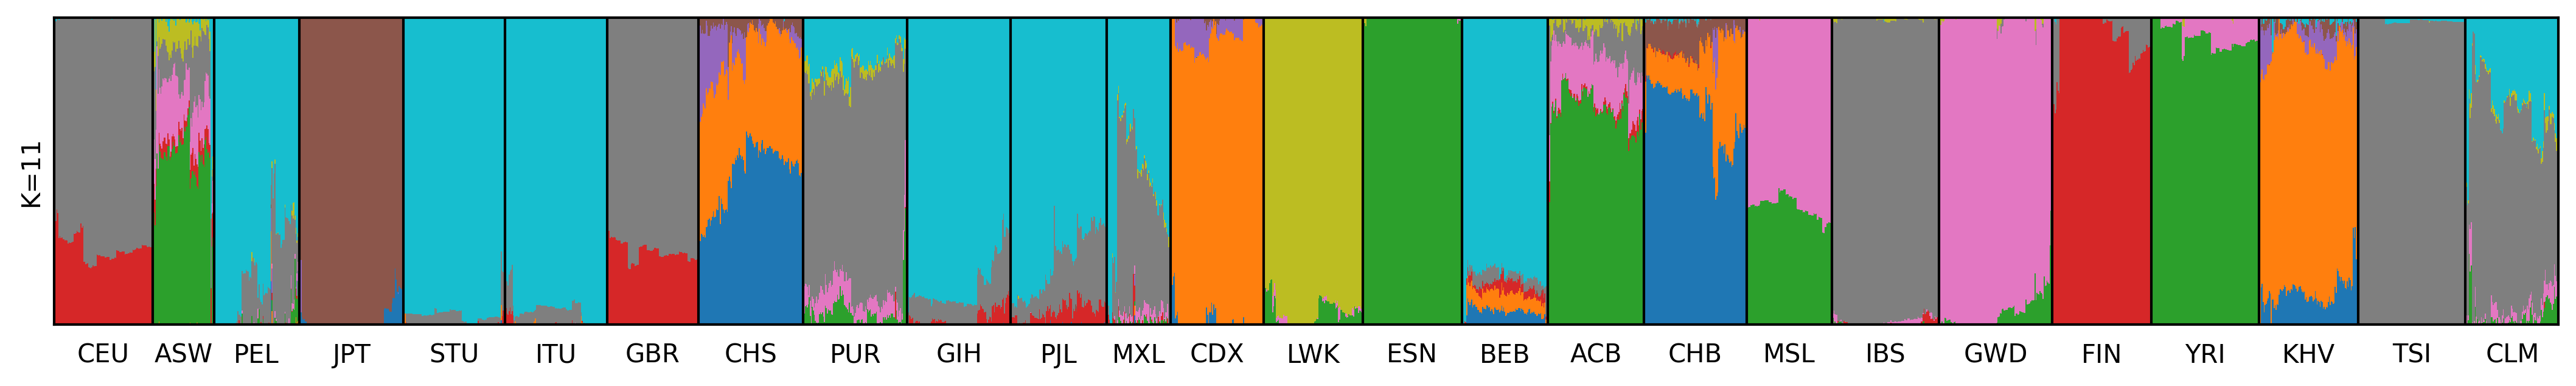

In [5]:
from geneview import admixtureplot

f, ax = plt.subplots(1, 1, figsize=(14, 2), facecolor="w", constrained_layout=True, dpi=300)
admixtureplot(data="../../examples/data/admixture.output.Q", 
              population_info="../../examples/data/admixture_population.info",
              ax=ax)


<AxesSubplot:ylabel='K=11'>

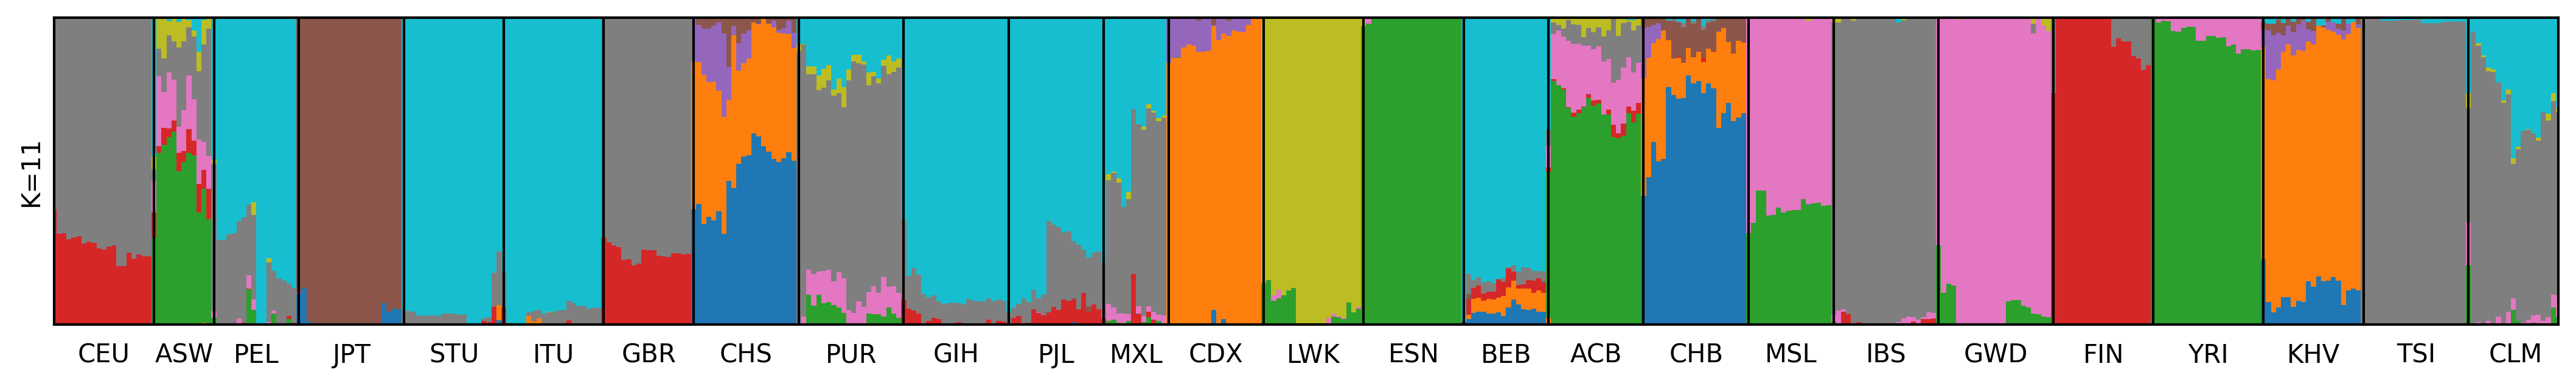

In [6]:
admixtureplot(data="../../examples/data/admixture.output.Q", 
              population_info="../../examples/data/admixture_population.info",
              shuffle_popsample_kws={"frac": 0.2})

<AxesSubplot:ylabel='K=11'>

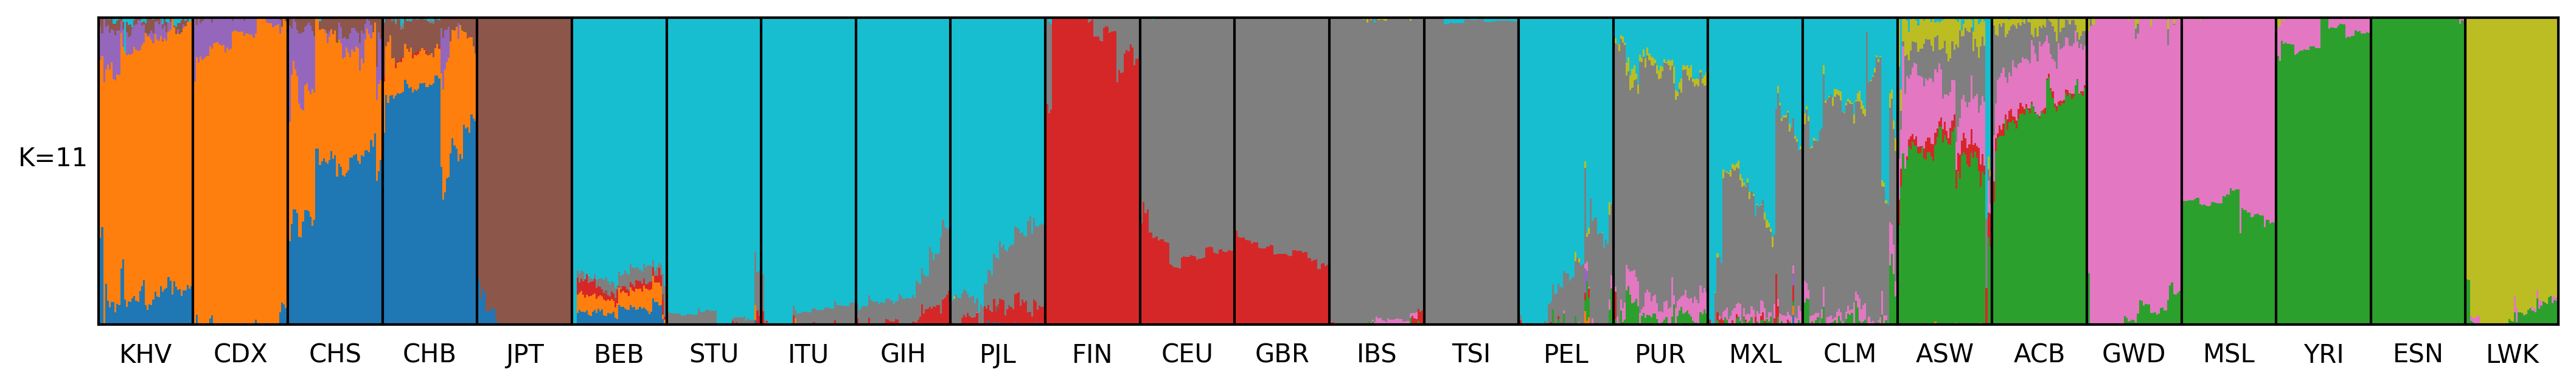

In [7]:
# define the order for population to plot
pop_group_1kg = ["KHV", "CDX", "CHS", "CHB", "JPT", "BEB", "STU", "ITU", "GIH", "PJL", "FIN", 
                 "CEU", "GBR", "IBS", "TSI", "PEL", "PUR", "MXL", "CLM", "ASW", "ACB", "GWD", 
                 "MSL", "YRI", "ESN", "LWK"]

f, ax = plt.subplots(1, 1, figsize=(14, 2), facecolor="w", constrained_layout=True, dpi=300)
admixtureplot(data="../../examples/data/admixture.output.Q", 
              population_info="../../examples/data/admixture_population.info",
              group_order=pop_group_1kg,
              shuffle_popsample_kws={"n": 50},
              ylabel_kws={"rotation": 0, "ha": "right"},
              ax=ax)

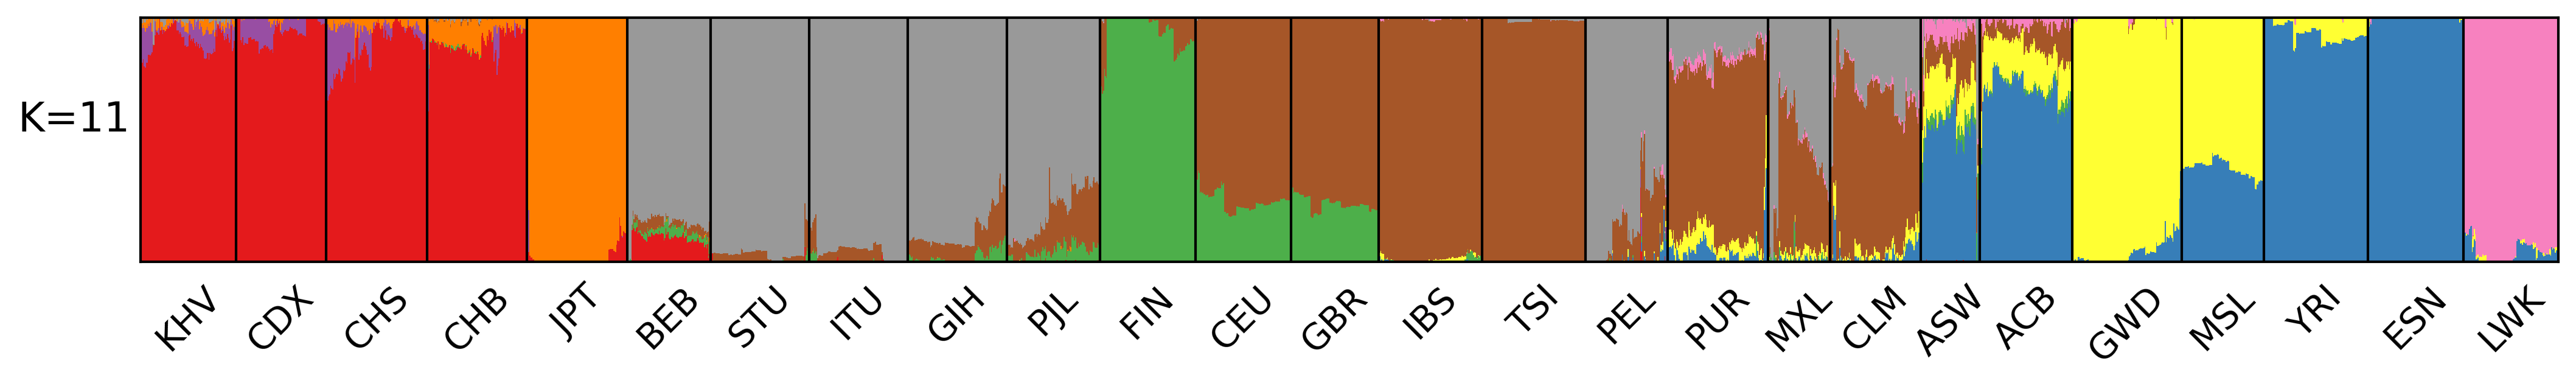

In [8]:


df = pd.read_table("../../examples/data/admixture.output.Q", sep=" ", header=None)
sample_info = pd.read_table("../../examples/data/admixture_population.info", sep="\t", header=None, names=["Group"])
popset = set(sample_info["Group"])

data = {}
for g in popset:
    g_data = df[sample_info["Group"]==g].copy()
    # Sub sampling: keep less than 140 samples for each group
    data[g] = g_data.sample(n=140, random_state=100) if len(g_data)>140 else g_data


### Plot
params = {"legend.fontsize": 14,
          "axes.labelsize": 16,
          "xtick.labelsize": 14,
          "ytick.labelsize": 14}
plt.rcParams.update(params)

# define a plot
f, ax = plt.subplots(1, 1, figsize=(14, 2), facecolor="w", constrained_layout=True, dpi=300)
_ = admixtureplot(data=data, 
                  group_order=pop_group_1kg,
                  palette="Set1", 
                  xticklabel_kws={"rotation": 45},
                  ylabel="K=11", 
                  ylabel_kws={"rotation": 0, "ha": "right"},
                  ax=ax)
